<a href="https://colab.research.google.com/github/pkmariya/Scaler01/blob/master/Apollo_CaseStudy_Mariya_DSML22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective
### Apollo wants to know, 
*   which variables are significant in predicting the reason for hospitalization for different regions
*   how well some variables like viral load, smoking, severity level describe the hospitalization charges

#### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

#### Import & Load data

In [2]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/681/original/scaler_apollo_hospitals.csv")

# Statistical Summary

### Meta-data of dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1338 non-null   int64  
 1   age                      1338 non-null   int64  
 2   sex                      1338 non-null   object 
 3   smoker                   1338 non-null   object 
 4   region                   1338 non-null   object 
 5   viral load               1338 non-null   float64
 6   severity level           1338 non-null   int64  
 7   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


### Description of the dataframe

In [4]:
df.describe()

,Unnamed: 0,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,10.221233,1.094918,33176.058296
std,386.391641,14.049960,2.032796,1.205493,30275.029296
min,0.000000,18.000000,5.320000,0.000000,2805.000000
25%,334.250000,27.000000,8.762500,0.000000,11851.000000
50%,668.500000,39.000000,10.130000,1.000000,23455.000000
75%,1002.750000,51.000000,11.567500,2.000000,41599.500000
max,1337.000000,64.000000,17.710000,5.000000,159426.000000


In [5]:
df.describe(include='all')

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338,1338,1338,1338.000000,1338.000000,1338.000000
unique,NaN,NaN,2,2,4,NaN,NaN,NaN
top,NaN,NaN,male,no,southeast,NaN,NaN,NaN
freq,NaN,NaN,676,1064,364,NaN,NaN,NaN
mean,668.500000,39.207025,NaN,NaN,NaN,10.221233,1.094918,33176.058296
std,386.391641,14.049960,NaN,NaN,NaN,2.032796,1.205493,30275.029296
min,0.000000,18.000000,NaN,NaN,NaN,5.320000,0.000000,2805.000000
25%,334.250000,27.000000,NaN,NaN,NaN,8.762500,0.000000,11851.000000
50%,668.500000,39.000000,NaN,NaN,NaN,10.130000,1.000000,23455.000000
75%,1002.750000,51.000000,NaN,NaN,NaN,11.567500,2.000000,41599.500000


In [6]:
# only object type columns
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


### Shape of the data

In [7]:
### Data shape
print("Apollo dataset has {} rows and {} columns.".format(df.shape[0], df.shape[1]))

Apollo dataset has 1338 rows and 8 columns.


### Size & Count

In [ ]:
# total number of elements/records 
df.size

10704

### Column Names

In [ ]:
# Columna names
df.columns

Index(['Unnamed: 0', 'age', 'sex', 'smoker', 'region', 'viral load',
       'severity level', 'hospitalization charges'],
      dtype='object')

### Column data typess

In [ ]:
### Data type of all attributes
df.dtypes

Unnamed: 0                   int64
age                          int64
sex                         object
smoker                      object
region                      object
viral load                 float64
severity level               int64
hospitalization charges      int64
dtype: object

# Data Pre-processing

### Check for Missing Values

In [ ]:
# Missing values
df.isnull().sum()

Unnamed: 0                 0
age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

#### **Observation**: *There is no missing value in the given dataset for any attribute*

### Check for duplicates

In [ ]:
# duplicates
df.duplicated().sum()

0

#### **Observation**: *There is no duplicate value in the given dataset*

In [ ]:
df.interpolate()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667
...,...,...,...,...,...,...,...,...
1333,1333,50,male,no,northwest,10.32,3,26501
1334,1334,18,female,no,northeast,10.64,0,5515
1335,1335,18,female,no,southeast,12.28,0,4075
1336,1336,21,female,no,southwest,8.60,0,5020


In [ ]:
df.head()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


### Dataset Copy

In [14]:
# Take a working copy of the given dataset
work_df = df.copy()

### Delete irrelevant columns

In [15]:
# Delete the columns that are not required/significant
work_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [16]:
work_df.shape

(1338, 7)

### Data categories

In [ ]:
cat_features = [x for x in work_df.columns if work_df[x].dtype == 'object']
cat_features

['sex', 'smoker', 'region']

In [18]:
num_features = [y for y in work_df.columns if work_df[y].dtype not in ('object', 'datetime64[ns')]
num_features

['age', 'viral load', 'severity level', 'hospitalization charges']

In [ ]:
date_features = [z for z in work_df.columns if work_df[z].dtype == 'datetime']
date_features

[]

# Exploratory Data Analysis (EDA)

### Non-Graphical Analysis

#### Unique value counts of all attributes

In [53]:
for col in work_df.columns:
  attribute_cnt = {f'{col} Count' : work_df[col].value_counts()}
  attribute_cnt = pd.DataFrame(attribute_cnt)
  print(attribute_cnt)

    age Count
18         69
19         68
50         29
51         29
47         29
46         29
45         29
20         29
48         29
52         29
22         28
49         28
54         28
53         28
21         28
26         28
24         28
25         28
28         28
27         28
23         28
43         27
29         27
30         27
41         27
42         27
44         27
31         27
40         27
32         26
33         26
56         26
34         26
55         26
57         26
37         25
59         25
58         25
36         25
38         25
35         25
39         25
61         23
60         23
63         23
62         23
64         22
        sex Count
male          676
female        662
     smoker Count
no           1064
yes           274
           region Count
southeast           364
southwest           325
northwest           325
northeast           324
       viral load Count
9.63                 13
10.77                13
11.37                12
10.1

#### Value Counts

In [74]:
subset_df = work_df[work_df.columns.unique() < 10]
subset_df

IndexingError: ignored

In [65]:

for col in work_df.columns:
  if len(work_df[col].unique()) < 10:
    subset_df.append(col)
subset_df

TypeError: ignored

In [39]:
# Value counts of certain attributes
for col in work_df.columns:
  if len(work_df[col].unique())<10:
    print(f"Column is: {col} and Values are:")
    print(work_df[col].unique())
    print()

Column is: sex and Values are:
['female' 'male']

Column is: smoker and Values are:
['yes' 'no']

Column is: region and Values are:
['southwest' 'southeast' 'northwest' 'northeast']

Column is: severity level and Values are:
[0 1 3 2 5 4]



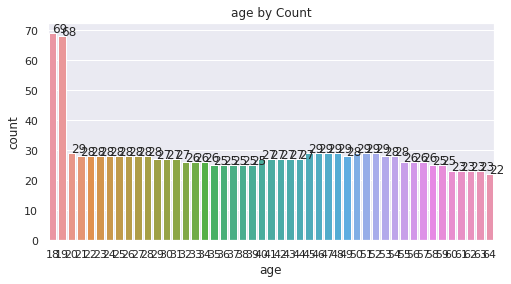

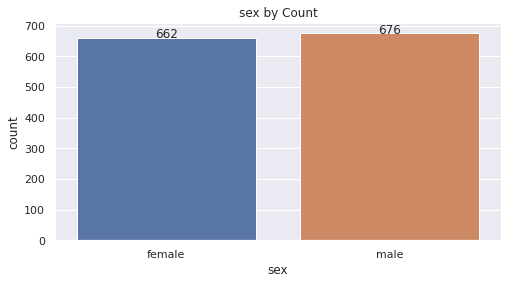

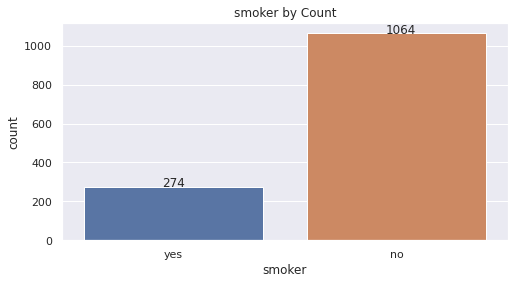

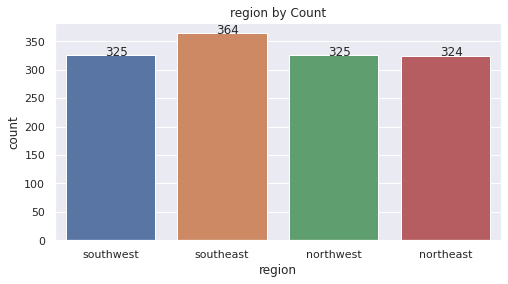

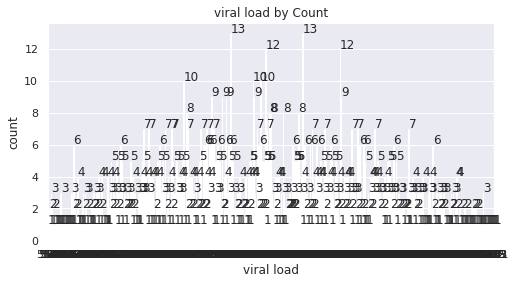

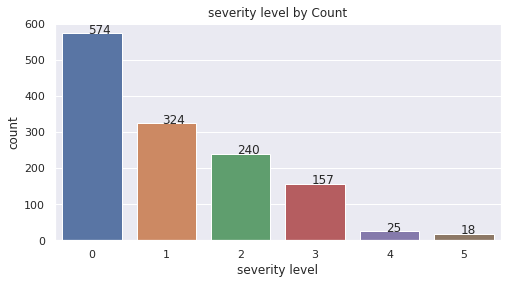

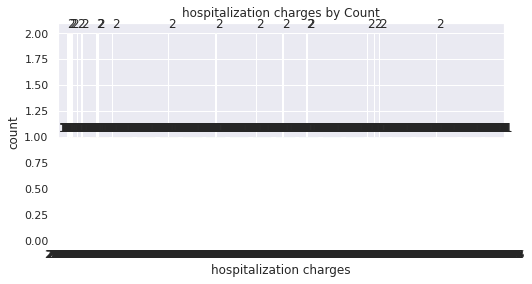

In [57]:
# Count plot for all attributes
for col in work_df.columns:
  ax = sns.countplot(data=work_df, x=col)
  plt.title(f"{col} by Count")
  for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+0.05))
  plt.show()


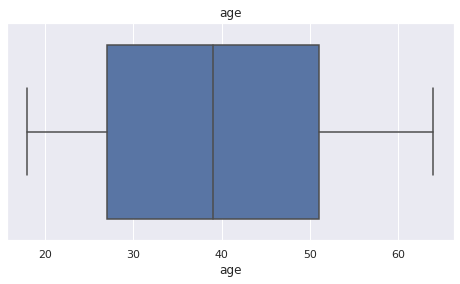

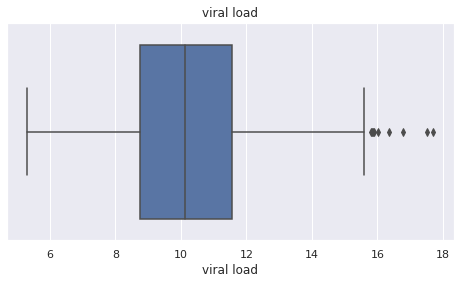

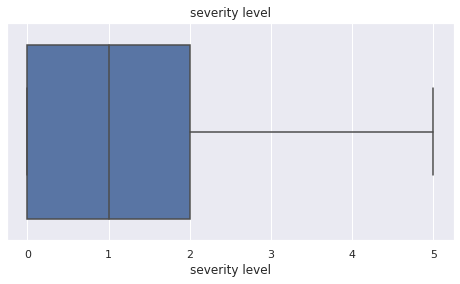

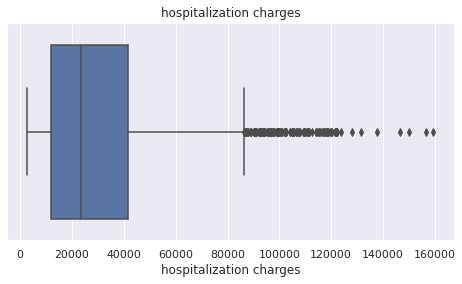

In [23]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(8,4)})

for col in num_features:
  p = sns.boxplot(data=work_df,x=col)
  p.set(title=f'{col}')
  plt.show()

#### **Observation**: *The above charts indicate, we have outliers for 'viral load' and 'hospitalization charges'*